### K-Means Clustering to Create Park Typologies

#### Authors: Eric Englin, Sophie Abo, Mac Lang
#### Date: 7/14/23


**Description**
This code uses a park-level dataset of 2021 recreation visits, size, settings (urban, rural, suburban), and visitation patterns (sporadic, seasonal, sustained). The code uses k-means clustering to create park categories that can be interpreted for typologies. 

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


In [41]:
df = pd.read_excel(r"C:\Users\Eric.Englin\DOT OST\volpe-proj-VU16A100 - Emerging Mobility\Subgroup Support\Traveler Information Technologies\Park Typologies + NPS.gov Content\NPS Park List.xlsx")

In [42]:
df.head()

NPS name Setting  Recreation Visits (2021)   \
0             Aniakchak National Monument   rural                        145   
1             Aniakchak National Preserve   rural                        145   
2                      Alagnak Wild River   rural                        262   
3        Rio Grande Wild and Scenic River   rural                        275   
4  Yukon-Charley Rivers National Preserve   rural                        629   

  Size  (acres) visitation patterns  remove  
0        137176                  NaN    NaN  
1     464117.93                  NaN    NaN  
2      30664.79                  NaN    NaN  
3      13123.39                  NaN    NaN  
4    2526512.44                  NaN    NaN

In [43]:
kmeans = KMeans(
    init="random",
     n_clusters=8,
     n_init=10,
     max_iter=300,
     random_state=42
)


In [45]:
one_hot = pd.get_dummies(df['Setting'])
df = df.drop('Setting',axis = 1)
# Join the encoded df
df = df.join(one_hot)

one_hot = pd.get_dummies(df['visitation patterns '])
df = df.drop('visitation patterns ',axis = 1)
# Join the encoded df
df = df.join(one_hot)



In [47]:
df = df.loc[df['remove']!="Yes"]

In [49]:
kmeans.fit(df[['Recreation Visits (2021) ', 
       'Size  (acres)', 'rural', 'suburban', 'urban', '1. Sporadic',
       '2. Seasonal', '3. Sustained', '4. Unclear']])

KMeans(init='random', random_state=42)

In [50]:
kmeans.labels_[:5]

array([3, 3, 3, 3, 6])

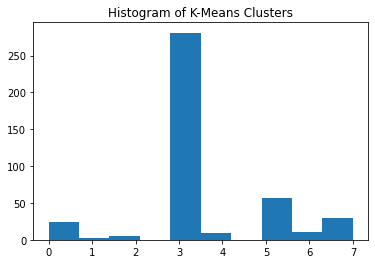

In [53]:
plt.hist(kmeans.labels_)
plt.title("Histogram of K-Means Clusters")
plt.show()

In [62]:
df['cluster'] = kmeans.labels_

In [65]:
df.head()

NPS name  Recreation Visits (2021)   \
0             Aniakchak National Monument                        145   
1             Aniakchak National Preserve                        145   
2                      Alagnak Wild River                        262   
3        Rio Grande Wild and Scenic River                        275   
4  Yukon-Charley Rivers National Preserve                        629   

  Size  (acres) remove  rural  suburban  urban  1. Sporadic  2. Seasonal  \
0        137176    NaN      1         0      0            0            0   
1     464117.93    NaN      1         0      0            0            0   
2      30664.79    NaN      1         0      0            0            0   
3      13123.39    NaN      1         0      0            0            0   
4    2526512.44    NaN      1         0      0            0            0   

   3. Sustained  4. Unclear  Not in Database  cluster  
0             0           0                0        3  
1             0           0                0        3  
2             0           0                0        3  
3             0           0                0        3  
4             0           0                0        6

In [73]:
df.to_excel(r"C:\Users\Eric.Englin\DOT OST\volpe-proj-VU16A100 - Emerging Mobility\Subgroup Support\Traveler Information Technologies\Park Typologies + NPS.gov Content\NPS Park cluster results.xlsx")

In [83]:
df = df.sort_values(by=['cluster']).reset_index()

In [93]:
print(len(df.loc[df['cluster']==0]), " in cluster 0")
df.loc[df['cluster']==0]

24  in cluster 0


index                                         NPS name  \
0     192                 Mount Rushmore National Memorial   
1     421                        Vietnam Veterans Memorial   
2     420     Chattahoochee River National Recreation Area   
3     419                     Korean War Veterans Memorial   
4     418  San Francisco Maritime National Historical Park   
5     194              Assateague Island National Seashore   
6     195                            Olympic National Park   
7     196                    Point Reyes National Seashore   
8     197                        Joshua Tree National Park   
9     198                            Glacier National Park   
10    199             Glen Canyon National Recreation Area   
11    200                  Cape Hatteras National Seashore   
12    422                            World War II Memorial   
13    202                        Grand Teton National Park   
14    203                       Cape Cod National Seashore   
15    204                             Acadia National Park   
16    205                     Rocky Mountain National Park   
17    206                       Grand Canyon National Park   
18    193                    Big Cypress National Preserve   
19    333                    Cuyahoga Valley National Park   
20    334                Colonial National Historical Park   
21    335                      Indiana Dunes National Park   
22    336      Delaware Water Gap National Recreation Area   
23    201                           Yosemite National Park   

    Recreation Visits (2021)  Size  (acres) remove  rural  suburban  urban  \
0                     2525868       1278.45    NaN      1         0      0   
1                     3636033          2.18    NaN      0         0      1   
2                     3256151      12416.75    NaN      0         0      1   
3                     2986751          1.56    NaN      0         0      1   
4                     2827885         49.86    NaN      0         0      1   
5                     2662716       41346.5    NaN      1         0      0   
6                     2718925     922649.41    NaN      1         0      0   
7                     2738098      71053.38    NaN      1         0      0   
8                     3064400     795155.85    NaN      1         0      0   
9                     3081656    1013126.39    NaN      1         0      0   
10                    3144318    1254116.62    NaN      1         0      0   
11                    3206056      30350.65    NaN      1         0      0   
12                    3727167          8.25    NaN      0         0      1   
13                    3885230     310044.36    NaN      1         0      0   
14                    4017239      43608.39    NaN      1         0      0   
15                    4069098       49071.4    NaN      1         0      0   
16                    4434848     265847.74    NaN      1         0      0   
17                    4532677    1201647.03    NaN      1         0      0   
18                    2563810     574453.32    NaN      1         0      0   
19                    2575275      32571.89    NaN      0         1      0   
20                    3114420       8675.04    NaN      0         1      0   
21                    3177210      15349.08    NaN      0         1      0   
22                    4340902      68708.88    NaN      0         1      0   
23                    3287595      761747.5    NaN      1         0      0   

    1. Sporadic  2. Seasonal  3. Sustained  4. Unclear  Not in Database  \
0             0            1             0           0                0   
1             0            1             0           0                0   
2             0            1             0           0                0   
3             0            1             0           0                0   
4             0            1             0           0                0   
5             0            1             0          

In [94]:
print(len(df.loc[df['cluster']==1]), " in cluster 1")
df.loc[df['cluster']==1]

3  in cluster 1


index                              NPS name  Recreation Visits (2021)   \
24    340   Great Smoky Mountains National Park                   14161548   
25    341                    Blue Ridge Parkway                   15948148   
26    426  Golden Gate National Recreation Area                   13712614   

   Size  (acres) remove  rural  suburban  urban  1. Sporadic  2. Seasonal  \
24     522426.88    NaN      0         1      0            0            1   
25     101101.88    NaN      0         1      0            0            1   
26      82116.03    NaN      0         0      1            0            0   

    3. Sustained  4. Unclear  Not in Database  cluster  
24             0           0                0        1  
25             0           0                0        1  
26             1           0                0        1

In [95]:
print(len(df.loc[df['cluster']==2]), " in cluster 2")
df.loc[df['cluster']==2]

5  in cluster 2


index                              NPS name  Recreation Visits (2021)   \
27    120                  Denali National Park                     229521   
28     11     Gates of the Arctic National Park                       7362   
29     73  Wrangell-St. Elias National Preserve                      50189   
30     24              Noatak National Preserve                      12891   
31     72      Wrangell-St. Elias National Park                      50189   

   Size  (acres) remove  rural  suburban  urban  1. Sporadic  2. Seasonal  \
27    4740911.16    NaN      1         0      0            0            1   
28    7523897.45    NaN      1         0      0            0            0   
29    4852644.89    NaN      1         0      0            0            0   
30    6587071.39    NaN      1         0      0            0            0   
31    8323146.48    NaN      1         0      0            0            0   

    3. Sustained  4. Unclear  Not in Database  cluster  
27             0           0                0        2  
28             0           0                0        2  
29             0           0                0        2  
30             0           0                0        2  
31             0           0                0        2

In [96]:
print(len(df.loc[df['cluster']==3]), " in cluster 3")
df.loc[df['cluster']==3]

281  in cluster 3


index                                           NPS name  \
32      82                    Effigy Mounds National Monument   
33      83                         El Morro National Monument   
34      84   Perry's Victory and International Peace Memorial   
35      85                  Natural Bridges National Monument   
36      86           Florissant Fossil Beds National Monument   
..     ...                                                ...   
308    357  Rosie the Riveter/World War II Home Front Nati...   
309    379                    Lowell National Historical Park   
310    356         William Howard Taft National Historic Site   
311    378  Longfellow House-Washington's Headquarters Nat...   
312    374     John Fitzgerald Kennedy National Historic Site   

     Recreation Visits (2021)  Size  (acres) remove  rural  suburban  urban  \
32                       66734       2526.39    NaN      1         0      0   
33                       66734       1278.72    NaN      1         0      0   
34                       68010         25.38    NaN      1         0      0   
35                       73484       7636.49    NaN      1         0      0   
36                       75128       6278.09    NaN      1         0      0   
..                         ...           ...    ...    ...       ...    ...   
308                      19038        145.19    NaN      0         0      1   
309                      49721        143.37    NaN      0         0      1   
310                      17042          3.64    NaN      0         0      1   
311                      35895          1.98    NaN      0         0      1   
312                      29356          0.09    NaN      0         0      1   

     1. Sporadic  2. Seasonal  3. Sustained  4. Unclear  Not in Database  \
32             0            0             0           0                0   
33             0            0             0           0                0   
34             0            1             0           0                0   
35             1            0             0           0                0   
36             0            1             0           0                0   
..           ...          ...           ...         ...              ...   
308            0            0             0           0                0   
309            1            0             0           0                0   
310            0            0             0           0                0   
311            1            0             0           0                0   
312            0            0             0           0                0   

     cluster  
32         3  
33         3  
34         3  
35         3  
36         3  
..       ...  
308        3  
309        3  
310        3  
311        3  
312        3  

[281 rows x 14 columns]

In [97]:
print(len(df.loc[df['cluster']==4]), " in cluster 4")
df.loc[df['cluster']==4]

9  in cluster 4


index                                           NPS name  \
313    339                              Natchez Trace Parkway   
314    338                     Gulf Islands National Seashore   
315    337  Chesapeake and Ohio Canal National Historical ...   
316    425                   Gateway National Recreation Area   
317    424                 George Washington Memorial Parkway   
318    208                                 Zion National Park   
319    209                 Lake Mead National Recreation Area   
320    423                                   Lincoln Memorial   
321    207                          Yellowstone National Park   

     Recreation Visits (2021)  Size  (acres) remove  rural  suburban  urban  \
313                    6401346      52380.46    NaN      0         1      0   
314                    5458816     138306.64    NaN      0         1      0   
315                    5005217       19628.1    NaN      0         1      0   
316                    9060807      26606.63    NaN      0         0      1   
317                    6821179       6773.63    NaN      0         0      1   
318                    5039835     147242.66    NaN      1         0      0   
319                    7603474    1495855.53    NaN      1         0      0   
320                    5792331          7.29    NaN      0         0      1   
321                    4860242    2219790.71    NaN      1         0      0   

     1. Sporadic  2. Seasonal  3. Sustained  4. Unclear  Not in Database  \
313            0            0             1           0                0   
314            0            0             1           0                0   
315            0            1             0           0                0   
316            1            0             0           0                0   
317            0            0             1           0                0   
318            0            1             0           0                0   
319            0            1             0           0                0   
320            0            1             0           0                0   
321            0            1             0           0                0   

     cluster  
313        4  
314        4  
315        4  
316        4  
317        4  
318        4  
319        4  
320        4  
321        4

In [98]:
print(len(df.loc[df['cluster']==5]), " in cluster 5")
df.loc[df['cluster']==5]

57  in cluster 5


index                                           NPS name  \
322    316                    Fort Matanzas National Monument   
323    156                             Big Bend National Park   
324    317                       Muir Woods National Monument   
325    318                  Gettysburg National Military Park   
326    319                             Biscayne National Park   
327    321            Cumberland Gap National Historical Park   
328    326                              Saguaro National Park   
329    322              Little River Canyon National Preserve   
330    325  Chickamauga and Chattanooga National Military ...   
331    157                     Petrified Forest National Park   
332    315                             Catoctin Mountain Park   
333    320  Fredericksburg and Spotsylvania County Battlef...   
334    323          Timucuan Ecological and Historic Preserve   
335    313           Castillo de San Marcos National Monument   
336    145                         Kenai Fjords National Park   
337    146                 Montezuma Castle National Monument   
338    147                        Flight 93 National Memorial   
339    148                              Redwood National Park   
340    149                  Wright Brothers National Memorial   
341    150                         Colorado National Monument   
342    151                         Mammoth Cave National Park   
343    153                     Devils Tower National Monument   
344    312                     Fort Pulaski National Monument   
345    154                     Cape Lookout National Seashore   
346    155                         Kings Canyon National Park   
347    152                           Mesa Verde National Park   
348    314                 Manassas National Battlefield Park   
349    158                     Great Sand Dunes National Park   
350    400                         Cabrillo National Monument   
351    171                 Ross Lake National Recreation Area   
352    161           San Juan Island National Historical Park   
353    168  Whiskeytown-Shasta-Trinity National Recreation...   
354    167                   Theodore Roosevelt National Park   
355    165                     Cedar Breaks National Monument   
356    164               Saint Croix National Scenic Riverway   
357    163                            Wind Cave National Park   
358    162                          Crater Lake National Park   
359    160                     Padre Island National Seashore   
360    166                          White Sands National Park   
361    170                            Haleakala National Park   
362    169  Big South Fork National River and Recreation Area   
363    406                    Boston National Historical Park   
364    405                Minute Man National Historical Park   
365    407                         Gateway Arch National Park   
366    403    Santa Monica Mountains National Recreation Area   
367    173                          Canyonlands National Park   
368    174                 Curecanti National Recreation Area   
369    175                              Sequoia National Park   
370    404                  Fort Point National Historic Site   
371    396                               World War I Memorial   
372    176                   Amistad National Recreation Area   
373    398                               Fort Washington Park   
374    399                             National Capital Parks   
375    159                 Great Sand Dunes National Preserve   
376    401                    San Juan National Historic Site   
377    402              Fort Vancouver National Historic Site   
378    397                      Dwight D. Eisenhower Memorial   

     Recreation Visits (2021)  Size  (acres) remove  rural  suburban  urban  \
322                     562114        300.11    NaN      0         1      0   
323                     581220     801163.21    NaN      1         0      0 

In [99]:
print(len(df.loc[df['cluster']==6]), " in cluster 6")
df.loc[df['cluster']==6]

11  in cluster 6


index                                NPS name  Recreation Visits (2021)   \
379    177              Death Valley National Park                    1146551   
380    172                Mojave National Preserve                     866635   
381     20              Kobuk Valley National Park                      11540   
382    121                Denali National Preserve                     229521   
383     30                Lake Clark National Park                      18278   
384     91               Glacier Bay National Park                      89768   
385     40                    Katmai National Park                      24764   
386      4  Yukon-Charley Rivers National Preserve                        629   
387    324                Everglades National Park                     942130   
388      5    Bering Land Bridge National Preserve                       2642   
389     31            Lake Clark National Preserve                      18278   

    Size  (acres) remove  rural  suburban  urban  1. Sporadic  2. Seasonal  \
379    3408395.63    NaN      1         0      0            1            0   
380    1549709.37    NaN      1         0      0            0            0   
381    1750716.16    NaN      1         0      0            0            0   
382     1334117.8    NaN      1         0      0            0            1   
383    2619816.49    NaN      1         0      0            0            0   
384    3223383.43    NaN      1         0      0            0            1   
385    3674529.33    NaN      1         0      0            0            0   
386    2526512.44    NaN      1         0      0            0            0   
387     1400539.3    NaN      0         1      0            0            1   
388    2697391.01    NaN      1         0      0            0            0   
389    1410293.68    NaN      1         0      0            0            0   

     3. Sustained  4. Unclear  Not in Database  cluster  
379             0           0                0        6  
380             1           0                0        6  
381             0           0                0        6  
382             0           0                0        6  
383             0           0                0        6  
384             0           0                0        6  
385             0           0                0        6  
386             0           0                0        6  
387             0           0                0        6  
388             0           0                0        6  
389             0           0                0        6

In [100]:
print(len(df.loc[df['cluster']==7]), " in cluster 7")
df.loc[df['cluster']==7]

30  in cluster 7


index                                       NPS name  \
390    331                      Hot Springs National Park   
391    330     New River Gorge National Park and Preserve   
392    329                       Shenandoah National Park   
393    328  San Antonio Missions National Historical Park   
394    327                 Pearl Harbor National Memorial   
395    408                                  National Mall   
396    180         Lake Meredith National Recreation Area   
397    181              Pictured Rocks National Lakeshore   
398    182                Ozark National Scenic Riverways   
399    183        Lake Roosevelt National Recreation Area   
400    190                           Arches National Park   
401    189         Sleeping Bear Dunes National Lakeshore   
402    178                         Badlands National Park   
403    332                    Canaveral National Seashore   
404    191                     Bryce Canyon National Park   
405    409          Independence National Historical Park   
406    188                    Mount Rainier National Park   
407    416             Franklin Delano Roosevelt Memorial   
408    415                                Rock Creek Park   
409    414                      Thomas Jefferson Memorial   
410    413    Kennesaw Mountain National Battlefield Park   
411    410          Valley Forge National Historical Park   
412    412               Castle Clinton National Monument   
413    411            Statue of Liberty National Monument   
414    417              Martin Luther King, Jr., Memorial   
415    187     John D. Rockefeller, Jr., Memorial Parkway   
416    186             Chickasaw National Recreation Area   
417    179                Hawai'i Volcanoes National Park   
418    184                     Capitol Reef National Park   
419    185                         Buffalo National River   

     Recreation Visits (2021)  Size  (acres) remove  rural  suburban  urban  \
390                    2162884       5554.15    NaN      0         1      0   
391                    1682720      72390.91    NaN      0         1      0   
392                    1592312     200445.92    NaN      0         1      0   
393                    1335071        990.28    NaN      0         1      0   
394                    1185369         21.64    NaN      0         1      0   
395                    1215836        155.84    NaN      0         0      1   
396                    1307769      44977.63    NaN      1         0      0   
397                    1313179      73235.97    NaN      1         0      0   
398                    1328773       80784.3    NaN      1         0      0   
399                    1336629     100390.31    NaN      1         0      0   
400                    1806865      76678.98    NaN      1         0      0   
401                    1722955      71309.91    NaN      1         0      0   
402                    1224226     242755.94    NaN      1         0      0   
403                    2218059      57661.69    NaN      0         1      0   
404                    2104600      35835.08    NaN      1         0      0   
405                    1495686         44.87    NaN      0         0      1   
406                    1670063     236381.64    NaN      1         0      0   
407                    2022050          8.14    NaN      0         0      1   
408                    1838346        1754.7    NaN      0         0      1   
409                    1833924         18.36    NaN      0         0      1   
410                    1800823       2913.63    NaN      0         0      1   
411                    1502209       3468.54    NaN      0         0      1   
412                    1665660             1    NaN      0         0      1   
413                    1556482         58.38    NaN      0         0      1   
414                    2032470          2.74    NaN      0         0      1   
415                    1603962      23777.22    NaN      1 